In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import zipfile
import requests
import pickle

from scipy import sparse

# DoL DATA SETUP 


## IMPORT DATA FROM DoL

In [10]:

!curl -O https://www.onetcenter.org/dl_files/database/db_23_2_excel.zip
#Data Dictionary: https://www.onetcenter.org/dictionary/23.2/mysql
!unzip db_23_2_excel.zip
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48.3M  100 48.3M    0     0   690k      0  0:01:11  0:01:11 --:--:--  736k48.2M    0     0   690k      0  0:01:11  0:01:11 --:--:--  665k
Archive:  db_23_2_excel.zip
   creating: db_23_2_excel/
  inflating: db_23_2_excel/Read Me.txt  
  inflating: db_23_2_excel/Green DWA Reference.xlsx  
  inflating: db_23_2_excel/Scales Reference.xlsx  
  inflating: db_23_2_excel/Occupation Data.xlsx  
  inflating: db_23_2_excel/Task Statements.xlsx  
  inflating: db_23_2_excel/Sample of Reported Titles.xlsx  
  inflating: db_23_2_excel/IWA Reference.xlsx  
  inflating: db_23_2_excel/Career Starters Matrix.xlsx  
  inflating: db_23_2_excel/Alternate Titles.xlsx  
  inflating: db_23_2_excel/Green Occupations.xlsx  
  inflating: db_23_2_excel/Interests.xlsx  
  inflating: db_23_2_excel/Education, Training, and Experience Categories.xlsx  
  inf

In [65]:
#Import Content Model Reference
#!curl -O https://www.onetcenter.org/dl_files/database/db_23_2_excel/Content%20Model%20Reference.xlsx
!curl -O https://www.onetcenter.org/dl_files/database/db_23_2_excel/Alternate%20Titles.xlsx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1266k  100 1266k    0     0   494k      0  0:00:02  0:00:02 --:--:--  494k


In [62]:
!ls

#                                db_23_2_excel
Content%20Model%20Reference.xlsx db_23_2_excel.zip
DoL Data Setup.ipynb


In [ ]:
dab = pd.read_excel('db_23_2_excel/Abilities.xlsx')

In [ ]:
datadic = {}
datadic['Model Reference'] = pd.read_excel('Content%20Model%20Reference.xlsx')
datadic['Alternate Titles'] = pd.read_excel('Alternate%20Titles.xlsx')

In [67]:
dct = datadic['Alternate Titles']
dcm = datadic['Model Reference']

In [38]:
dab.sample(20)

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
47942,29-2052.00,Pharmacy Technicians,1.A.4.b.5,Speech Clarity,IM,Importance,3.38,8.0,0.26,2.86,3.89,N,NaN,07/2013,Analyst
78523,49-2092.00,"Electric Motor, Power Tool, and Related Repairers",1.A.1.a.2,Written Comprehension,LV,Level,3.00,8.0,0.00,3.00,3.00,N,N,07/2017,Analyst
5937,13-1021.00,"Buyers and Purchasing Agents, Farm Products",1.A.1.b.1,Fluency of Ideas,LV,Level,3.00,8.0,0.00,3.00,3.00,N,N,07/2013,Analyst
59868,39-6012.00,Concierges,1.A.3.a.4,Trunk Strength,IM,Importance,2.25,8.0,0.16,1.93,2.57,N,NaN,07/2012,Analyst
40089,27-3043.05,"Poets, Lyricists and Creative Writers",1.A.2.b.1,Control Precision,LV,Level,1.25,8.0,0.25,0.76,1.74,N,N,07/2017,Analyst
13141,15-1199.07,Data Warehousing Specialists,1.A.1.f.2,Visualization,LV,Level,2.75,8.0,0.37,2.03,3.47,N,N,08/2018,Analyst
53591,33-3041.00,Parking Enforcement Workers,1.A.1.e.2,Flexibility of Closure,LV,Level,2.25,8.0,0.16,1.93,2.57,N,N,07/2016,Analyst
36036,25-9011.00,Audio-Visual and Multimedia Collections Specia...,1.A.2.b.3,Response Orientation,IM,Importance,1.75,8.0,0.16,1.43,2.07,N,NaN,06/2010,Analyst
68782,43-9022.00,Word Processors and Typists,1.A.1.g.1,Selective Attention,IM,Importance,2.88,8.0,0.23,2.43,3.32,N,NaN,07/2017,Analyst
46630,29-2011.01,Cytogenetic Technologists,1.A.1.g.1,Selective Attention,IM,Importance,3.12,8.0,0.13,2.88,3.37,N,NaN,07/2014,Analyst


In [64]:
datadic['Model Reference']

,Element ID,Element Name,Description
0,1,Worker Characteristics,Worker Characteristics
1,1.A,Abilities,Enduring attributes of the individual that inf...
2,1.A.1,Cognitive Abilities,Abilities that influence the acquisition and a...
3,1.A.1.a,Verbal Abilities,Abilities that influence the acquisition and a...
4,1.A.1.a.1,Oral Comprehension,The ability to listen to and understand inform...
5,1.A.1.a.2,Written Comprehension,The ability to read and understand information...
6,1.A.1.a.3,Oral Expression,The ability to communicate information and ide...
7,1.A.1.a.4,Written Expression,The ability to communicate information and ide...
8,1.A.1.b,Idea Generation and Reasoning Abilities,Abilities that influence the application and m...
9,1.A.1.b.1,Fluency of Ideas,The ability to come up with a number of ideas ...


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


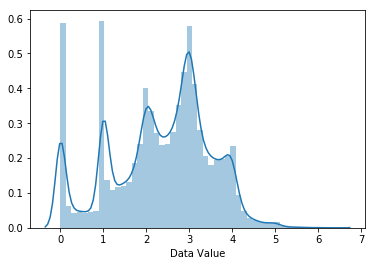

In [22]:
sns.distplot(dab['Data Value'])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


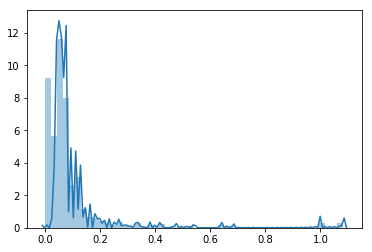

In [24]:
sns.distplot((dab['Standard Error']/dab['Data Value']).dropna())

In [18]:
len(dab['Title'].unique())

967

In [ ]:
sparse.

In [19]:
dab['Title'].unique()

array(['Chief Executives', 'Chief Sustainability Officers',
       'General and Operations Managers',
       'Advertising and Promotions Managers', 'Marketing Managers',
       'Sales Managers', 'Public Relations and Fundraising Managers',
       'Administrative Services Managers',
       'Computer and Information Systems Managers',
       'Treasurers and Controllers',
       'Financial Managers, Branch or Department',
       'Industrial Production Managers',
       'Quality Control Systems Managers',
       'Geothermal Production Managers', 'Biofuels Production Managers',
       'Biomass Power Plant Managers',
       'Hydroelectric Production Managers', 'Purchasing Managers',
       'Transportation Managers', 'Storage and Distribution Managers',
       'Logistics Managers', 'Compensation and Benefits Managers',
       'Human Resources Managers', 'Training and Development Managers',
       'Nursery and Greenhouse Managers', 'Farm and Ranch Managers',
       'Aquacultural Managers', 'Co

In [15]:
dab['Element Name'].unique()

array(['Oral Comprehension', 'Written Comprehension', 'Oral Expression',
       'Written Expression', 'Fluency of Ideas', 'Originality',
       'Problem Sensitivity', 'Deductive Reasoning',
       'Inductive Reasoning', 'Information Ordering',
       'Category Flexibility', 'Mathematical Reasoning',
       'Number Facility', 'Memorization', 'Speed of Closure',
       'Flexibility of Closure', 'Perceptual Speed',
       'Spatial Orientation', 'Visualization', 'Selective Attention',
       'Time Sharing', 'Arm-Hand Steadiness', 'Manual Dexterity',
       'Finger Dexterity', 'Control Precision', 'Multilimb Coordination',
       'Response Orientation', 'Rate Control', 'Reaction Time',
       'Wrist-Finger Speed', 'Speed of Limb Movement', 'Static Strength',
       'Explosive Strength', 'Dynamic Strength', 'Trunk Strength',
       'Stamina', 'Extent Flexibility', 'Dynamic Flexibility',
       'Gross Body Coordination', 'Gross Body Equilibrium', 'Near Vision',
       'Far Vision', 'Visual Co

In [26]:
dab['O*NET-SOC Code'].unique()

array(['11-1011.00', '11-1011.03', '11-1021.00', '11-2011.00',
       '11-2021.00', '11-2022.00', '11-2031.00', '11-3011.00',
       '11-3021.00', '11-3031.01', '11-3031.02', '11-3051.00',
       '11-3051.01', '11-3051.02', '11-3051.03', '11-3051.04',
       '11-3051.06', '11-3061.00', '11-3071.01', '11-3071.02',
       '11-3071.03', '11-3111.00', '11-3121.00', '11-3131.00',
       '11-9013.01', '11-9013.02', '11-9013.03', '11-9021.00',
       '11-9031.00', '11-9032.00', '11-9033.00', '11-9039.01',
       '11-9039.02', '11-9041.00', '11-9041.01', '11-9051.00',
       '11-9061.00', '11-9071.00', '11-9081.00', '11-9111.00',
       '11-9121.00', '11-9121.01', '11-9121.02', '11-9131.00',
       '11-9141.00', '11-9151.00', '11-9161.00', '11-9199.01',
       '11-9199.02', '11-9199.03', '11-9199.04', '11-9199.07',
       '11-9199.08', '11-9199.09', '11-9199.10', '11-9199.11',
       '13-1011.00', '13-1021.00', '13-1022.00', '13-1023.00',
       '13-1031.01', '13-1031.02', '13-1032.00', '13-10

In [30]:
def translate(src,value,dest):
        return dab[dab[src]==value][dest].unique()[0]

In [35]:
translate('O*NET-SOC Code','15-1199.01','Title'),translate('O*NET-SOC Code','15-1199.05','Title'),translate('O*NET-SOC Code','15-1199.09','Title')

('Software Quality Assurance Engineers and Testers',
 'Geographic Information Systems Technicians',
 'Information Technology Project Managers')

In [36]:
translate('O*NET-SOC Code','15-1199.01','Element Name')

'Oral Comprehension'

In [57]:
def ab(code, column='O*NET-SOC Code'):
        return dab[[code.lower() in soc.lower() for soc in dab[column]]]

In [60]:
ab('executive','Title')

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,IM,Importance,4.50,8.0,0.19,4.13,4.87,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,LV,Level,4.88,8.0,0.13,4.63,5.12,N,N,07/2014,Analyst
2,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,IM,Importance,4.25,8.0,0.16,3.93,4.57,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,LV,Level,4.62,8.0,0.18,4.27,4.98,N,N,07/2014,Analyst
4,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst
5,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,LV,Level,5.00,8.0,0.00,5.00,5.00,N,N,07/2014,Analyst
6,11-1011.00,Chief Executives,1.A.1.a.4,Written Expression,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
7,11-1011.00,Chief Executives,1.A.1.a.4,Written Expression,LV,Level,4.62,8.0,0.18,4.27,4.98,N,N,07/2014,Analyst
8,11-1011.00,Chief Executives,1.A.1.b.1,Fluency of Ideas,IM,Importance,3.88,8.0,0.13,3.63,4.12,N,NaN,07/2014,Analyst
9,11-1011.00,Chief Executives,1.A.1.b.1,Fluency of Ideas,LV,Level,4.62,8.0,0.18,4.27,4.98,N,N,07/2014,Analyst


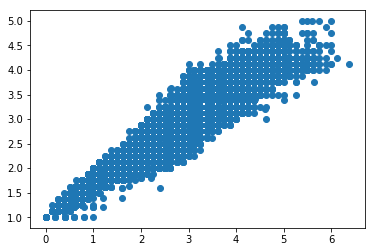

In [47]:
plt.scatter(y=dab[dab['Scale ID']=='IM']['Data Value'],x=dab[dab['Scale ID']=='LV']['Data Value'])

In [48]:
'ab' in 'abc'

True

In [68]:
dct.head()

,O*NET-SOC Code,Title,Alternate Title,Short Title,Source(s)
0,11-1011.00,Chief Executives,Aeronautics Commission Director,NaN,08
1,11-1011.00,Chief Executives,Agricultural Services Director,NaN,08
2,11-1011.00,Chief Executives,Alcohol and Drug Abuse Assistance Program Admi...,NaN,08
3,11-1011.00,Chief Executives,Arts and Humanities Council Director,NaN,08
4,11-1011.00,Chief Executives,Bakery Manager,NaN,08


In [76]:
ab('47-')

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
71552,47-1011.00,First-Line Supervisors of Construction Trades ...,1.A.1.a.1,Oral Comprehension,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2012,Analyst
71553,47-1011.00,First-Line Supervisors of Construction Trades ...,1.A.1.a.1,Oral Comprehension,LV,Level,3.88,8.0,0.13,3.63,4.12,N,N,07/2012,Analyst
71554,47-1011.00,First-Line Supervisors of Construction Trades ...,1.A.1.a.2,Written Comprehension,IM,Importance,3.38,8.0,0.18,3.02,3.73,N,NaN,07/2012,Analyst
71555,47-1011.00,First-Line Supervisors of Construction Trades ...,1.A.1.a.2,Written Comprehension,LV,Level,3.88,8.0,0.13,3.63,4.12,N,N,07/2012,Analyst
71556,47-1011.00,First-Line Supervisors of Construction Trades ...,1.A.1.a.3,Oral Expression,IM,Importance,3.88,8.0,0.13,3.63,4.12,N,NaN,07/2012,Analyst
71557,47-1011.00,First-Line Supervisors of Construction Trades ...,1.A.1.a.3,Oral Expression,LV,Level,4.00,8.0,0.00,4.00,4.00,N,N,07/2012,Analyst
71558,47-1011.00,First-Line Supervisors of Construction Trades ...,1.A.1.a.4,Written Expression,IM,Importance,3.38,8.0,0.18,3.02,3.73,N,NaN,07/2012,Analyst
71559,47-1011.00,First-Line Supervisors of Construction Trades ...,1.A.1.a.4,Written Expression,LV,Level,3.38,8.0,0.18,3.02,3.73,N,N,07/2012,Analyst
71560,47-1011.00,First-Line Supervisors of Construction Trades ...,1.A.1.b.1,Fluency of Ideas,IM,Importance,3.00,8.0,0.00,3.00,3.00,N,NaN,07/2012,Analyst
71561,47-1011.00,First-Line Supervisors of Construction Trades ...,1.A.1.b.1,Fluency of Ideas,LV,Level,3.00,8.0,0.00,3.00,3.00,N,N,07/2012,Analyst


In [78]:
deartops = pd.read_pickle('../census/deartops.pkl')
deyetops = pd.read_pickle('../census/deyetops.pkl')

In [80]:
deartops.sort_values(['FTE relative','dear-FTE USmean'],ascending=False)

,SOCP,Occupation,FTE relative,dear-FTE USmean,count,all count
380,516031,PRD-Sewing Machine Operators,4.47,117150.0,4,107
316,474031,CON-Fence Erectors,3.91,107429.0,1,4
186,339091,PRT-Crossing Guards,3.08,135000.0,1,9
72,1720XX,ENG-Biomedical And Agricultural Engineers,2.71,205528.0,4,49
217,395011,PRS-Barbers,2.27,89600.0,1,11
225,399041,PRS-Residential Advisors,2.21,59943.0,5,10
329,492092,"RPR-Electric Motor, Power Tool, And Related Re...",1.94,53073.0,7,59
268,434181,OFF-Reservation And Transportation Ticket Agen...,1.92,66677.0,8,188
291,451011,"FFF-First-Line Supervisors Of Farming, Fishing...",1.88,71244.0,2,20
40,132021,FIN-Appraisers And Assessors Of Real Estate,1.77,92019.0,6,132
